# Statistical Rethinking Chapter 3 Practice
> Answers in Python for this chapter's practice
- toc: true 
- badges: true
- comments: true
- categories: [statistical_rethinking]

In [8]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
def binormial_posterior(p_grid, prior, n, N):
    assert(len(p_grid) == len(prior))
    likelihood = stats.binom.pmf(n, N, p_grid)
    posterior = likelihood * prior
    posterior = posterior / sum(posterior)
    
    return posterior

def sample_posterior(p_grid, posterior, sample_size):
    assert(len(p_grid) == len(posterior))
    samples = np.random.choice(p_grid, size=sample_size, 
                               p=posterior, replace=True)
    
    return samples

### Easy

In [13]:
random.seed(100)
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
posterior = binormial_posterior(p_grid, prior, 6, 9)
samples = sample_posterior(p_grid, posterior, 10000)

(samples < 0.2).mean()
(samples > 0.8).mean()
((samples > 0.2) & (samples < 0.8)).mean()
np.quantile(samples, 0.2)
np.quantile(samples, 0.8)
pymc3.stats.hpd(samples, 0.66)
np.quantile(samples, [0.17, 0.83])

0.0008

0.1179

0.8813

0.5125125125125125

0.7587587587587588

array([0.52352352, 0.7977978 ])

array([0.49349349, 0.77277277])

### Medium

In [14]:
random.seed(100)
prior = np.ones(1000)
posterior = binormial_posterior(p_grid, prior, 8, 15)
samples = sample_posterior(p_grid, posterior, 10000)
pymc3.stats.hpd(samples, 0.9)
(np.random.binomial(15, samples) == 8).mean()
(np.random.binomial(9, samples) == 6).mean()

array([0.33233233, 0.72172172])

0.1475

0.1815

In [17]:
prior = np.hstack([np.zeros(500), 2*np.ones(500)])
random.seed(100)
posterior = binormial_posterior(p_grid, prior, 8, 15)
samples = sample_posterior(p_grid, posterior, 10000)
pymc3.stats.hpd(samples, 0.9)
print((np.random.binomial(15, samples) == 8).mean(),
      stats.binom.pmf(8, 15, 0.7))
print((np.random.binomial(9, samples) == 6).mean(),
      stats.binom.pmf(6, 9, 0.7))

array([0.5005005 , 0.71171171])

0.1544 0.08113003332934526
0.2351 0.2668279319999999


### Hard

In [18]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [19]:
n = birth1.sum() + birth2.sum()
n

111

In [20]:
prior = np.ones(1000)
random.seed(100)
posterior = binormial_posterior(p_grid, prior, n, 200)
p_grid[posterior==posterior.max()]

array([0.55455455])

In [21]:
samples = sample_posterior(p_grid, posterior, 10000)
[pymc3.stats.hpd(samples, iv) for iv in [0.5, 0.89, 0.97]]

[array([0.53153153, 0.57757758]),
 array([0.5015015 , 0.61161161]),
 array([0.47747748, 0.62662663])]

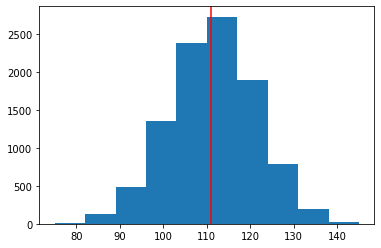

In [22]:
samples_n = np.random.binomial(200, samples)
plt.hist(samples_n)
plt.axvline(x=n, c='r');

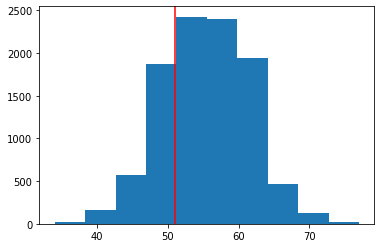

In [23]:
samples_n = np.random.binomial(100, samples)
plt.hist(samples_n)
plt.axvline(x=birth1.sum(), c='r');

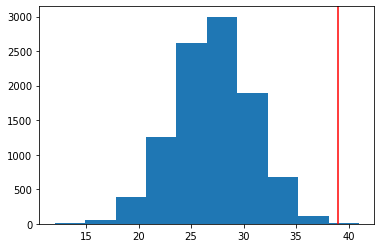

In [24]:
samples_n = np.random.binomial((birth1==0).sum(), samples)
plt.hist(samples_n)
plt.axvline(x=birth2[birth1==0].sum(), c='r');
# NOT INDEPENDENT